In [61]:
from sklearn.cluster import KMeans
import numpy as np

In [62]:
# Loading dataset
X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

In [63]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [64]:
# Seperating the Dataset (X) into 2 clusters (n_cluster define that)
kmeans = KMeans(n_clusters = 2,random_state = 0)

In [65]:
kmeans1 = KMeans(n_clusters=3,random_state=0)

In [66]:
# Training the data
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [67]:
kmeans1.fit(X)

KMeans(n_clusters=3, random_state=0)

In [68]:
# Making prediction from the data for which data point belong to which cluster
l1 = kmeans.labels_ # We can even write kmeans.predict

In [69]:
l1

array([1, 1, 1, 0, 0, 0])

In [70]:
l2= kmeans1.labels_

In [71]:
l2

array([1, 1, 1, 0, 0, 2])

In [72]:
np.array([[0,0],[12,3]])

array([[ 0,  0],
       [12,  3]])

In [73]:
# Making prediction for new data point for in which cluster will it fall.
kmeans.predict([[0,0],[12,3]])

array([1, 0])

In [74]:
kmeans1.predict([[0,0],[12,0],[6,2]])

array([1, 2, 0])

In [15]:
kmeans1.predict([[9,3]])

array([0])

In [16]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [17]:
kmeans1.cluster_centers_

array([[10.,  3.],
       [ 1.,  2.],
       [10.,  0.]])

In [18]:
# Importing Library for silhouette Score calculation
from sklearn.metrics import silhouette_score

In [19]:
# Passing the Data(X) and predicted clusters in which they belong (l1)
silhouette_score(X,l1)

0.7133477791749615

In [20]:
silhouette_score(X,l2)

0.43630092057240805

In [22]:
kmeans.inertia_

16.0

In [23]:
kmeans1.inertia_

10.0

In [ ]:
# Assignment in Class

1. import datset
2. k=3,4,5,6,7
3. wcss/insertia_
4. plot it and find optimal k value
5. sihloutee score and dunn index

In [29]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [69]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [85]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [86]:
# Dropping Gender and Customer ID 
df1= df.drop(['CustomerID','Gender'],axis =1)

In [87]:
df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

* Finding WCSS Score

In [90]:
wcss =[]
for i in [3,4,5,6,7]:
    kmeans2 = KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans2.fit(df1)
    wcss.append(kmeans2.inertia_)
print('WCSS Sum for nos of clusters ',wcss)
    

[143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51098.58740856845]


* Calculating Silhouette Score

In [91]:
# Predicted value for cluster
kmeans2.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 6, 0, 4, 1,
       4, 0, 6, 1, 1, 1, 6, 1, 1, 6, 6, 6, 6, 6, 1, 6, 6, 1, 6, 6, 6, 1,
       6, 6, 1, 1, 6, 6, 6, 6, 6, 1, 6, 1, 1, 6, 6, 1, 6, 6, 1, 6, 6, 1,
       1, 6, 6, 1, 6, 1, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 1, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 1, 1, 1, 3, 1, 3, 1, 3, 5, 3, 5, 3,
       1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

In [94]:
l3 = kmeans2.labels_

In [96]:
silhouette_score(df1,l3)

0.4403208668029096

* Calculating Dunn Index

In [120]:
# Importing library for Dunn Index
from sklearn.metrics import davies_bouldin_score

In [114]:
kmeans2.fit(df1)

KMeans(n_clusters=7, random_state=30)

In [115]:
kmeans2.predict(df1)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 6, 0, 4, 1,
       4, 0, 6, 1, 1, 1, 6, 1, 1, 6, 6, 6, 6, 6, 1, 6, 6, 1, 6, 6, 6, 1,
       6, 6, 1, 1, 6, 6, 6, 6, 6, 1, 6, 1, 1, 6, 6, 1, 6, 6, 1, 6, 6, 1,
       1, 6, 6, 1, 6, 1, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 1, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 1, 1, 1, 3, 1, 3, 1, 3, 5, 3, 5, 3,
       1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

In [121]:
l4=kmeans2.predict(df1)

In [122]:
davies_bouldin_score(df1,l4)

0.7936875760467846

* Plotting the model

In [102]:
# Importing required Library
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [99]:
Aglo_cluster = AgglomerativeClustering()

In [100]:
# Fitting the Dataset
Aglo_cluster.fit(df1)

AgglomerativeClustering()

In [101]:
# Lbaels of Fitted model
Aglo_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [108]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(df1)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [109]:
model

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [110]:
# Writing code to Plot Dendogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

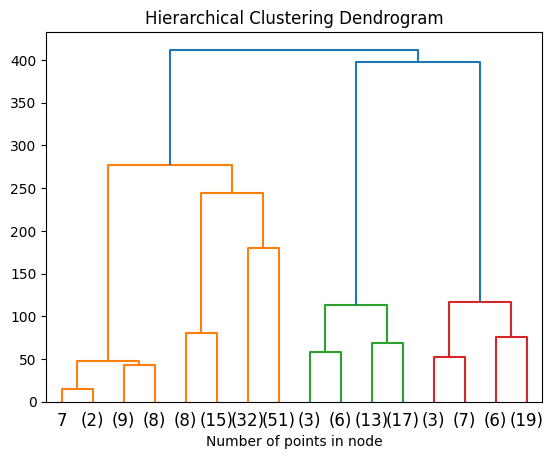

In [113]:
# Plotting the dendogram
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

* Finding Optimal K value

In [123]:
wcss

[143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51098.58740856845]

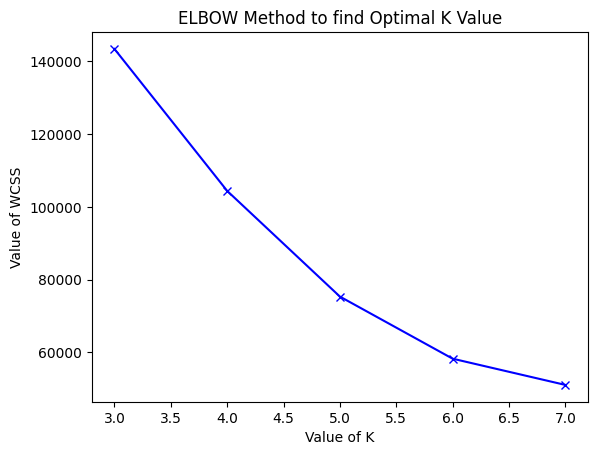

In [125]:
k = range(3,8)
plt.plot(k,wcss,'bx-')
plt.title('ELBOW Method to find Optimal K Value')
plt.xlabel('Value of K')
plt.ylabel('Value of WCSS')
plt.show()

* Thus Optimal K value from Above figure is 6